In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", "distance_complete", "supercomputer", "networks")

In [3]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [4]:
folder = "connectivity_distance"

In [5]:
e = Experiments()
e.add_experiment(name="0",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"))
e.add_experiment(name="45",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-13"))
e.add_experiment(name="90",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-10"))


In [ ]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

In [ ]:
%%time
neuron_type = "dSPN"
result_dictionary = connectivity_distance_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300, use_network_file=True)


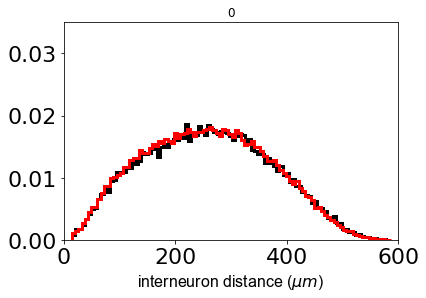

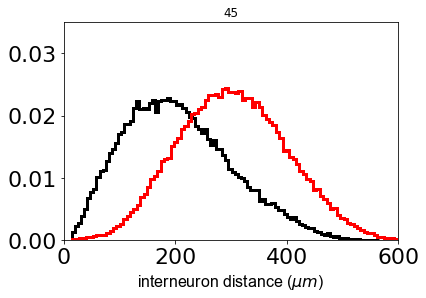

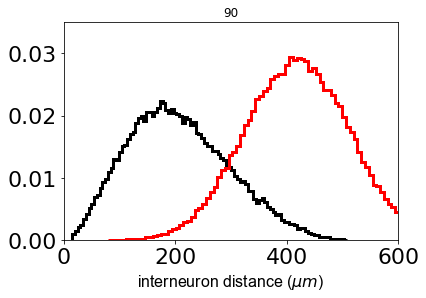

In [9]:
import numpy as np
csfont = {"fontname": "Arial", 'fontsize': 16}
for e in result_dictionary:
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 1, 1)
    plt.title(e)
    weights = np.ones_like(result_dictionary[e]["within"])/len(result_dictionary[e]["within"])
    plt.hist(np.array(result_dictionary[e]["within"]) * 1e6, bins=100, color="black", histtype=u'step', lw=3, weights=weights)
    weights = np.ones_like(result_dictionary[e]["between"])/len(result_dictionary[e]["between"])
    plt.hist(np.array(result_dictionary[e]["between"]) * 1e6, bins=100, color="red", histtype=u'step', lw=3, weights=weights)
    plt.xlim((0,600))
    plt.xlabel(r"interneuron distance ($\mu m$)", **csfont)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    plt.ylim(0,35e-3)
    plt.savefig(os.path.join("connectivity_distance", f"distance_plot_{e}.svg"))
    plt.show()